In [2]:
%load_ext autoreload
%autoreload 2
exec(open('init_notebook.py').read())
from matplotlib import pyplot as plt
from highD.HighD import HighD
from highD.Filter import Filter
from highD.Plot import Plot
from highD.Visualizer import GIF
from highD.helper import *

current working dirC:\Users\abjawad\Documents\GitHub\cogMod-driver-behavior-model\highd_tools


## Read dataset
Read highd files from the defined `Data_directory` folder.

- The function takes in `ids` which is a list of id (e.g. ["01", "02"])
- Returns two variables: `dfs`, `images`
- `dfs` is a tuple (recordingMeta, tracksMeta, tracks)
- `images` is a list of highway images

In [7]:
ids = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", 
       "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", 
       "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", 
       "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", 
       "41", "42", "43", "44", "45", "46", "47", "48", "49", "50", 
       "51", "52", "53", "54", "55", "56", "57", "58", "59", "60"]
# ids = ["01", "02"]
highD = HighD(ids, DATA_DIRECTORY)


Loaded data and image for dataset 01.
Loaded data and image for dataset 02.
Loaded data and image for dataset 03.
Loaded data and image for dataset 04.
Loaded data and image for dataset 05.
Loaded data and image for dataset 06.
Loaded data and image for dataset 07.
Loaded data and image for dataset 08.
Loaded data and image for dataset 09.
Loaded data and image for dataset 10.
Loaded data and image for dataset 11.
Loaded data and image for dataset 12.
Loaded data and image for dataset 13.
Loaded data and image for dataset 14.
Loaded data and image for dataset 15.
Loaded data and image for dataset 16.
Loaded data and image for dataset 17.
Loaded data and image for dataset 18.
Loaded data and image for dataset 19.
Loaded data and image for dataset 20.
Loaded data and image for dataset 21.
Loaded data and image for dataset 22.
Loaded data and image for dataset 23.
Loaded data and image for dataset 24.
Loaded data and image for dataset 25.
Loaded data and image for dataset 26.
Loaded data 

In [5]:
dataset_id = 1 # remember that the dataset_id is 1-based
sceMeta, tMeta, tracks = highD.get_dataframe_tuple(dataset_id)
df = highD.get_combined_dataframe(dataset_id)
image = highD.get_image(dataset_id)
sceMeta.head()

,id,frameRate,locationId,speedLimit,month,weekDay,startTime,duration,totalDrivenDistance,totalDrivenTime,numVehicles,numCars,numTrucks,upperLaneMarkings,lowerLaneMarkings
0,1,25,2,-1.0,9.2017,Tue,08:38,901.56,418549.19,13908.12,1047,863,184,8.51;12.59;16.43,21.00;24.96;28.80


# Tracks Meta Distributions 

Filtering by colName class, val Car
Filtering by colName minTHW, val (0, 200)
Filtering by colName minTTC, val (0, 200)
Filtered dataframe from 1047 to 628 rows, ratio 0.5998089780324737


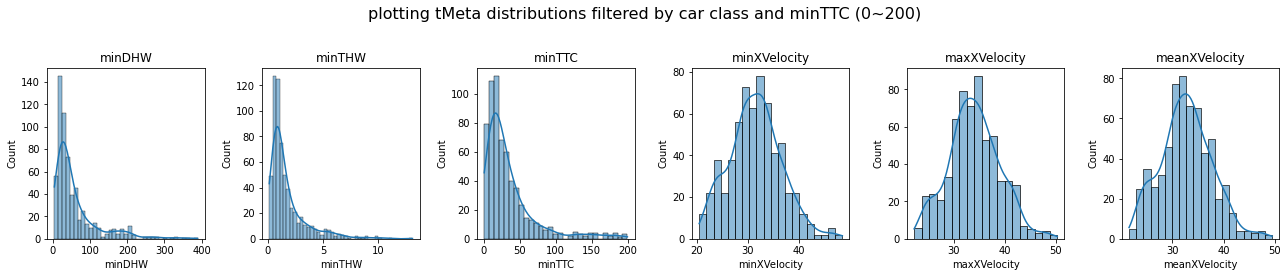

In [6]:
filtered_tMeta = Filter.filter_dataframe(tMeta, 
                                        'class', 'Car', 
                                        'minTHW', (0,200),
                                        'minTTC', (0,200))
Plot.plot_tMeta_distributions(filtered_tMeta, 'plotting tMeta distributions filtered by car class and minTTC (0~200)')

## Velocity distribution of one dataset

In [ ]:
filtered_df = Filter.filter_dataframe(df, 
                                     'class', 'Car')
Plot.plot_speed_distribution_by_lane(filtered_df, 'speed dist by car class')

filtered_df = Filter.filter_dataframe(df,
                                     'class', 'Truck')
Plot.plot_speed_distribution_by_lane(filtered_df, 'speed dist by truck class')


### Plot distribution from tracks 

In [ ]:
# Call the function with a filtered DataFrame, a title, and any number of columns
filtered_df = Filter.filter_dataframe(df,
                                     'class', 'Car', 
                                     'ttc', (0,200))
Plot.plot_tracks_distributions(filtered_df, 'ttc', 'thw', 'thw',
                               title='plotting TTC, THW, DHW distributions filtered by car class')

### Calculated TTC == ttc in dataset
In the helper.py has creates similar values as in the dataset

In [ ]:
df_with_calc_ttc = calculate_ttc(df)

filtered_df = Filter.filter_dataframe(df_with_calc_ttc,
                                     'class', 'Car',
                                     'ttc', (0,200),
                                     'calculated_ttc', (0,200))

print('KS test statistic: ', ks_test_ttc(filtered_df))
Plot.plot_tracks_distributions(filtered_df, 
                              'calculated_ttc', 'ttc',
                              title='plotting calculated TTC and TTC distributions')

In [ ]:
# todo acceleration distribution

# Code for driving direction and lane id

In [ ]:
df.columns